In [1]:
import time
import tracemalloc
import matplotlib.pyplot as plt
import numpy as np
from functools import lru_cache

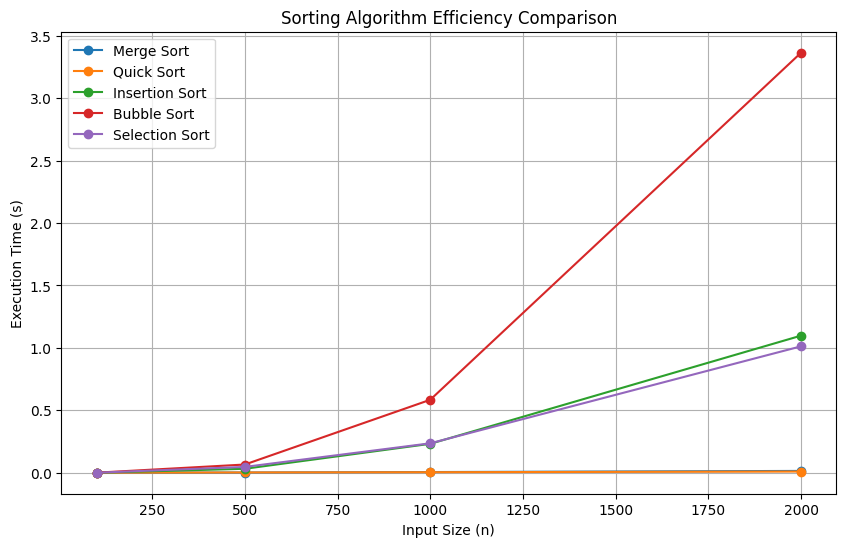

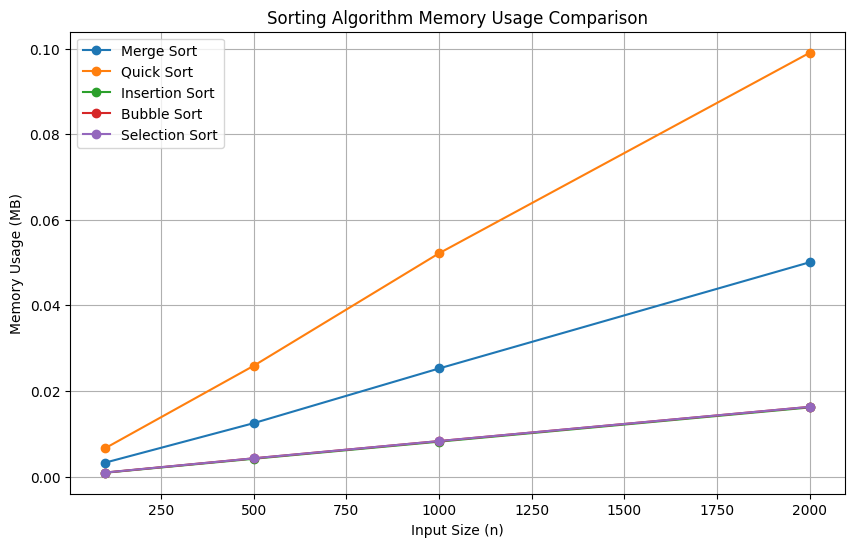

In [3]:
# ----------------------------
# 3. Binary Search
# ----------------------------


def binary_search(arr, target):
    low, high = 0, len(arr)-1
    while low <= high:
        mid = (low+high)//2
        if arr[mid] == target:
            return mid
        elif arr[mid] < target:
            low = mid+1
        else:
            high = mid-1
    return -1


# ----------------------------
# Sorting Algorithms
# ----------------------------

def merge_sort(arr):
    if len(arr) <= 1:
        return arr
    mid = len(arr) // 2
    left_half = arr[:mid]
    right_half = arr[mid:]
    left_half = merge_sort(left_half)
    right_half = merge_sort(right_half)
    return merge(left_half, right_half)

def merge(left, right):
    merged = []
    i, j = 0, 0
    while i < len(left) and j < len(right):
        if left[i] <= right[j]:
            merged.append(left[i])
            i += 1
        else:
            merged.append(right[j])
            j += 1
    merged.extend(left[i:])
    merged.extend(right[j:])
    return merged

def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quick_sort(left) + middle + quick_sort(right)

def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key
    return arr

def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n - i - 1):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
    return arr

def selection_sort(arr):
    for i in range(len(arr)):
        min_idx = i
        for j in range(i + 1, len(arr)):
            if arr[j] < arr[min_idx]:
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]
    return arr


# ----------------------------
# 4. Profiling Utility
# ----------------------------


def profile_algorithm(func, arr):
    tracemalloc.start()
    start_time = time.time()
    result = func(arr.copy())
    end_time = time.time()
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    return end_time - start_time, peak / 10**6, result


# ----------------------------
# 5. Run Experiments
# ----------------------------


algorithms = {
    'Merge Sort': merge_sort,
    'Quick Sort': quick_sort,
    'Insertion Sort': insertion_sort,
    'Bubble Sort': bubble_sort,
    'Selection Sort': selection_sort
}


sizes = [100, 500, 1000, 2000]
results = {algo: [] for algo in algorithms}


for n in sizes:
    test_arr = np.random.randint(0, 10000, n).tolist()
    for name, algo in algorithms.items():
        t, m, _ = profile_algorithm(algo, test_arr)
        results[name].append((t, m))


# ----------------------------
# 6. Plot Graphs
# ----------------------------


plt.figure(figsize=(10, 6))
for name, data in results.items():
    times = [d[0] for d in data]
    plt.plot(sizes, times, marker='o', label=name)


plt.xlabel('Input Size (n)')
plt.ylabel('Execution Time (s)')
plt.title('Sorting Algorithm Efficiency Comparison')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
for name, data in results.items():
    mems = [d[1] for d in data]
    plt.plot(sizes, mems, marker='o', label=name)


plt.xlabel('Input Size (n)')
plt.ylabel('Memory Usage (MB)')
plt.title('Sorting Algorithm Memory Usage Comparison')
plt.legend()
plt.grid(True)
plt.show()